In the Business Understanding and Data Understanding part, we already discussed that combining calendar dataset and listings dataset might be a great source to answer question like what factors might influence the probability of a listing being booked?  

Again, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
calendar = pd.read_csv('calendar.csv')

Here I will use the calendar dataset to calculate the booked_persent of each listing in Seattle. There's a column called available in calendat dataset. I use  1 to replace 'True', and 0 to replace ' False' . Then I use 1- sum(available of each listing)/365 to represent the booked_persent of each listing.

In [2]:
# replace the t/f in available column with 1/0
calendar.loc[calendar['available']=='t','available']=1
calendar.loc[calendar['available']=='f','available']=0

# calculate each listing's booked_persent in 2016
listing_booking=pd.pivot_table(calendar,index=['listing_id'],values=['available'],aggfunc=np.sum)
listing_booking['booked_persent']=1-listing_booking['available']/365
listing_booking['id']=listing_booking.index
listing_booking.head()

,available,booked_persent,id
listing_id,,,
3335,309,0.153425,3335
4291,365,0.000000,4291
5682,309,0.153425,5682
6606,365,0.000000,6606
7369,53,0.854795,7369


Let's plot a histogram to see the distribution of booked_persent of all listings in Seattle

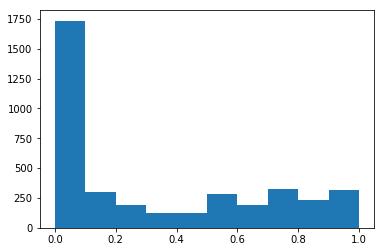

In [3]:
from matplotlib import pyplot as plt
plt.hist(listing_booking['booked_persent'])
plt.show()

From the histogram we can know, about 45% of listings has booked_persent lss than 10%

Next we will try to find what factors might influence the probability of a listing being booked. Let's read in the dataset listing that provide more detail information about each listing.

In [4]:
# read the listing dataset
listing=pd.read_csv('listings.csv')

listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# let's check what detail information of listings were offered by listing dataset:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

For each listing, we have 92 features. let's select those features that might influence the probability of booking.

In [11]:
raw=listing[['id','host_is_superhost','neighbourhood_group_cleansed','property_type','room_type','accommodates',
             'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','number_of_reviews','review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value','price']]

In [12]:
# change the data type of price from string to interger
raw['price']=raw['price'].str.replace('$','')
raw['price']=raw['price'].str.replace(',','')
raw['price']=raw['price'].astype('float64')


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [13]:
# check the number of missing values of each coulumn
raw.shape[0]-raw.count()

id                                0
host_is_superhost                 2
neighbourhood_group_cleansed      0
property_type                     1
room_type                         0
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
bed_type                          0
amenities                         0
number_of_reviews                 0
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
price                             0
dtype: int64

There are many missing values in review related features because these are new listings and don't get reviewed yet. In reality, travellers usually prefer listings with high number of reviews and high average review scores. A new listing that don't have any review scores might decrease the probability of booking. Considering this, I will replace missing values in review related features with 0.

In [17]:
# create a function that replace NA with 0
def fill_na(data,col_name):
    '''
    Function that fills na with 0 in review score related columns
    Args:
        data: name of dataset
        col_name: name of colums that have missing values
    ''' 
    data[col_name][np.isnan(data[col_name])]=0

# apply the function to review related features
for i in raw.filter(regex='^review'):
    fill_na(raw,i)

# check whether we successfully replace NAs with 0
raw.shape[0]-raw.count()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


id                               0
host_is_superhost                2
neighbourhood_group_cleansed     0
property_type                    1
room_type                        0
accommodates                     0
bathrooms                       16
bedrooms                         6
beds                             1
bed_type                         0
amenities                        0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_communication      0
review_scores_location           0
review_scores_value              0
price                            0
dtype: int64

We still have missing values in host_is_superhost,property_type ,bathrooms,bedrooms,beds. Since the number of missing values is low, so we just simply drop those records having missing values in these columns.

In [18]:
# drop those records having missing values in the rest of columns.
raw=raw.dropna(subset=['host_is_superhost','property_type','bathrooms','bedrooms','beds'])

raw.shape[0]-raw.count()

id                              0
host_is_superhost               0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
price                           0
dtype: int64

We successfully remove all of the missing values in the dataset. Next, I need to combine the listing description with its booked_persent.

In [49]:
listing_booking['id']=listing_booking['id'].astype('int64')

# merge the listing description dataset with listing booked_persent dataset
raw=pd.merge(raw, listing_booking, how='left', on=['id'])

In [50]:
raw.head()

,id,transit,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,available,booked_persent
0,241032,NaN,f,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0,346,0.052055
1,953595,"Convenient bus stops are just down the block, ...",t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0,291,0.202740
2,3308979,A bus stop is just 2 blocks away. Easy bus a...,f,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,975.0,220,0.397260
3,7421966,NaN,f,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,143,0.608219
4,278830,The nearest public transit bus (D Line) is 2 b...,f,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0,365,0.000000


For those numeric variable, let's make a correlation matrix to find the relationship between the booked_persent and listing description.

In [89]:
# only filter numeric features
raw2=raw[['accommodates','bathrooms', 'bedrooms', 'beds', 'amenities','number_of_reviews','review_scores_rating',
             'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
             'review_scores_communication', 'review_scores_location', 'review_scores_value','price','booked_persent']]

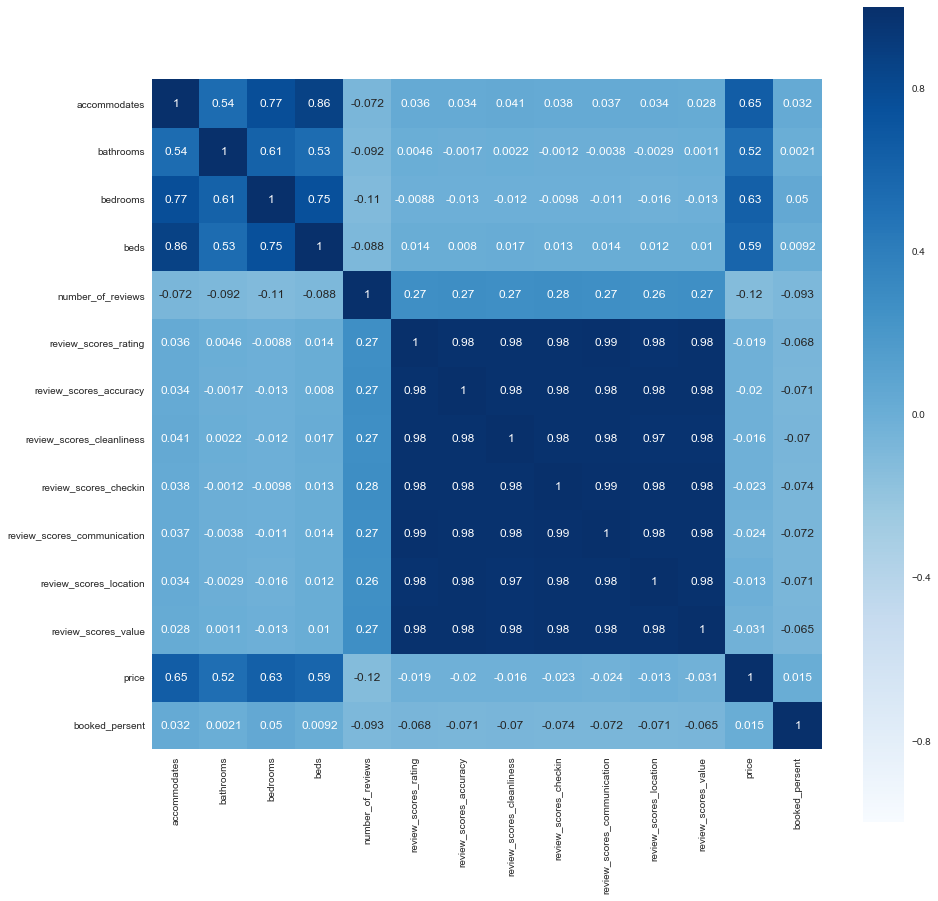

In [93]:
# plot the correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt
def cm(df):
    dfData = df.corr()
    plt.subplots(figsize=(15, 15)) 
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.show()

cm(raw2)

From the correlation matrix we can know that most of the numeric features seems not related to the booked_persent of the listing.

For those categorical features, I will use boxplot to show the relationship between the booked_persent and listing description.

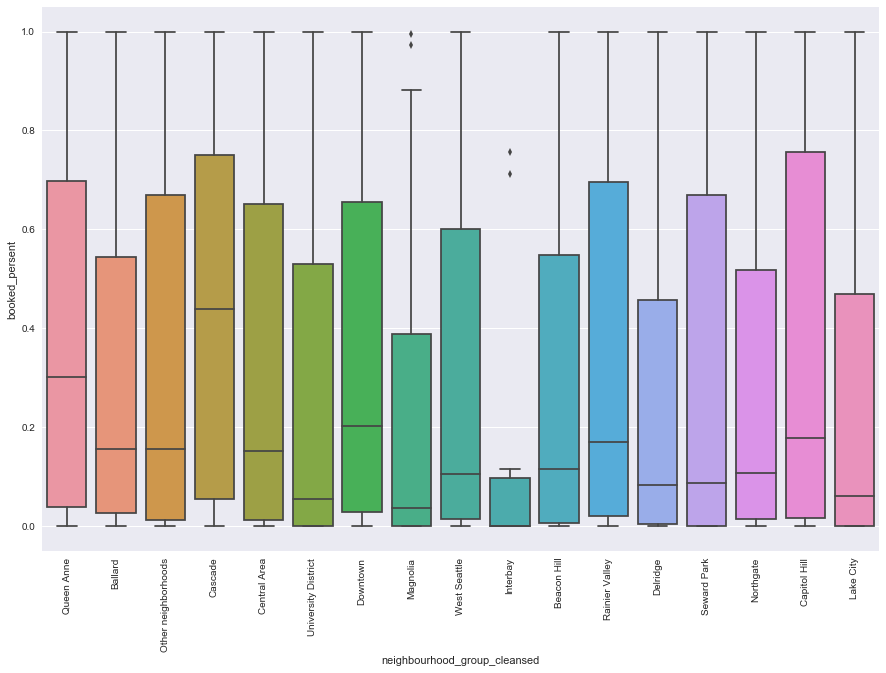

In [109]:
# make a box plot to see whether different neighbourhood group 's booked persent distribution varied
f, ax= plt.subplots(figsize = (15, 10))
sns.boxplot( x=raw['neighbourhood_group_cleansed'], y=raw['booked_persent'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.plt.show()


From the above boxplot about booked_persent of different neighbourhoods, we can find out that listings in Cascade is most popular, while listings in Magnolia and Interbay are most unpopular.

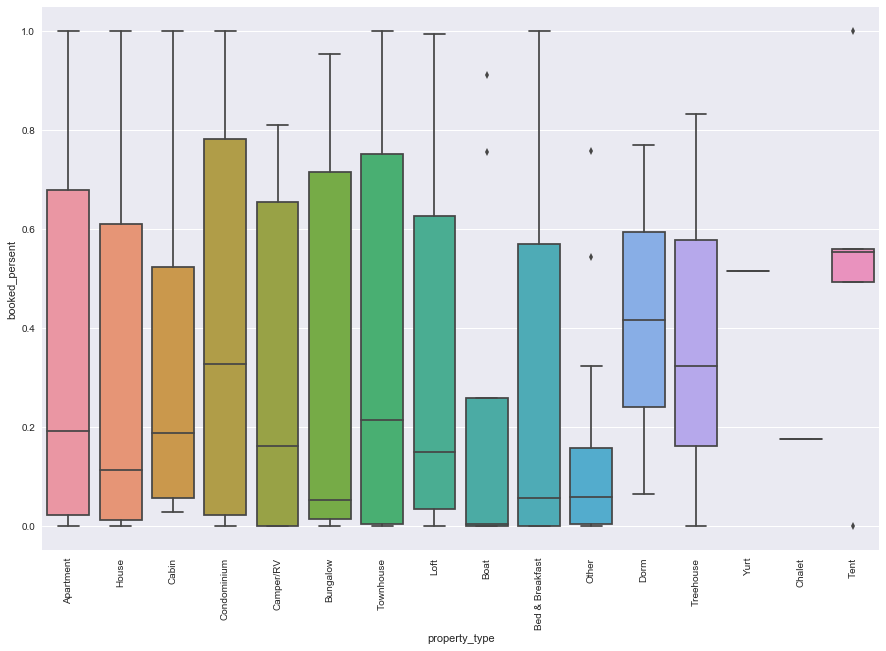

In [110]:
# make a box plot to see whether different property type's booked persent distribution varied
f, ax= plt.subplots(figsize = (15, 10))
sns.boxplot( x=raw['property_type'], y=raw['booked_persent'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.plt.show()



Condominium and doom are relatively more popular property_type.

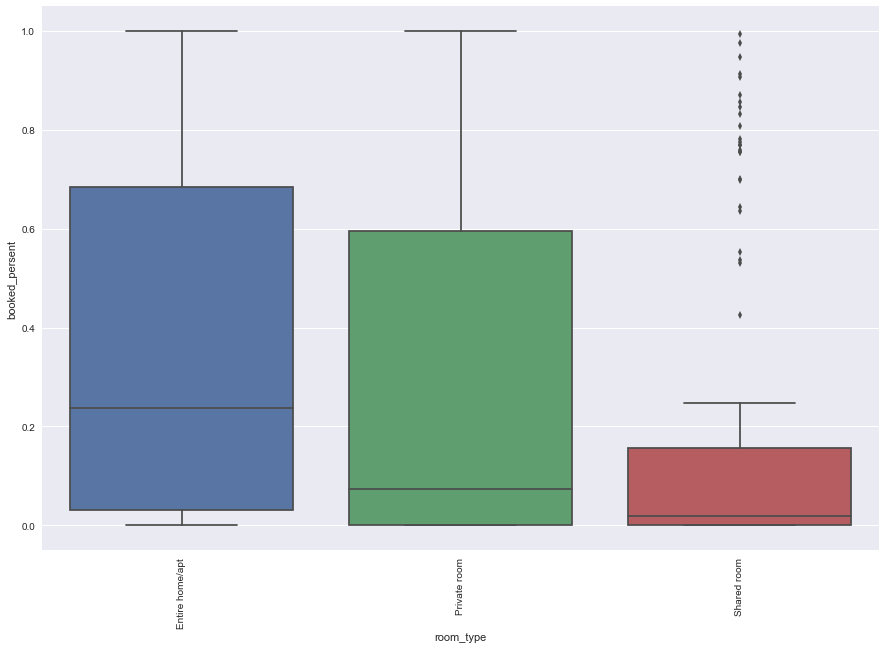

In [111]:
# make a box plot to see whether different room type's booked persent distribution varied
f, ax= plt.subplots(figsize = (15, 10))
sns.boxplot( x=raw['room_type'], y=raw['booked_persent'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.plt.show()

Entire home/apt is the most popular room_type.